In [10]:
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_ollama import ChatOllama

In [ ]:
def solve_expression(expression:str)->str:
    '''return a value after evalutating a python expression using the "eval()" function'''
    return eval(expression)

# Create the agent
model = ChatOllama(model="qwen3:1.7b")
tools = [solve_expression]
agent_executor = create_react_agent(model, tools)

In [68]:
# Use the agent
outt=""
outtt=""
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="solve 1-5*3/2")]},
    stream_mode="values",
):
    outt+=step["messages"][-1].pretty_repr()+"\n"
    outtt+=step["messages"][-1].text()+"\n"

In [63]:
print(outt)

================================ Human Message =================================

solve 1-5*3/2
================================== Ai Message ==================================

<think>
Okay, the user wants to solve the expression 1 - 5 * 3 / 2. Let me think about the order of operations here. According to PEMDAS, multiplication and division are done before subtraction. So first, I need to calculate 5 * 3, which is 15. Then divide that by 2, giving 7.5. Finally, subtract that from 1. So 1 - 7.5 equals -6.5. I should use the solve_expression function to evaluate this. The function will handle the calculation using eval(), so I just need to pass the expression as a string. Let me make sure the expression is correctly formatted: "1-5*3/2". The function should return -6.5. Alright, time to call the function.
</think>
Tool Calls:
  solve_expression (02440914-48bc-4f25-83d0-d09bac27d657)
 Call ID: 02440914-48bc-4f25-83d0-d09bac27d657
  Args:
    expression: 1-5*3/2
==========================

In [16]:
res=agent_executor.invoke(
    {"messages": [HumanMessage(content="solve 1-5*3/2")]},
)

In [ ]:
output=""
for file in res.get("messages"):
    output+=file.content+"\n"

In [69]:
from markdown import markdown
with open("text.html","w",encoding="utf-8") as f:
    f.write(markdown(outt))
with open("text.md","w",encoding="utf-8") as f:
    f.write(outtt)

In [49]:
from pprint import pformat,pprint
pprint(res)

{'messages': [HumanMessage(content='solve 1-5*3/2', additional_kwargs={}, response_metadata={}, id='4aed7527-54ab-46f2-91b9-5e830e7bce83'),
              AIMessage(content='<think>\nOkay, the user wants to solve the expression 1 - 5 * 3 / 2. Let me think about the order of operations here. According to PEMDAS, multiplication and division are done before subtraction. So first, I need to calculate 5 * 3, which is 15. Then divide that by 2, giving 7.5. Now subtract that from 1: 1 - 7.5 equals -6.5. Wait, but the tool they provided is called solve_expression, which uses eval(). Let me check if the expression is correctly formatted. The expression would be "1 - 5 * 3 / 2". Eval should handle that. So I should call the function with this expression. The result should be -6.5. I need to make sure the tool call is correctly structured with the expression parameter.\n</think>\n\n', additional_kwargs={}, response_metadata={'model': 'qwen3:1.7b', 'created_at': '2025-06-14T18:05:22.592536Z', 'done

In [80]:
open("text.md","w",encoding="utf-8").write(res.get("messages")[0].content+"\n"+res.get("messages")[-1].content)

495

In [2]:
import datetime
def solve_expression(expression:str)->str:
    '''return a value after evalutating a python expression using the "eval()" function'''
    return eval(expression)

def get_date():
    '''return today's date'''
    return datetime.datetime.now()

def get_info()->list[str]:
    '''return todays news'''
    return ["Over 80 Killed In Iran, Israel As Missiles Pound Middle East: 10 Points",
            "PM Modi on key 3-nation tour: Cyprus, Canada, Croatia on itinerary; what's on his agenda?",
            "7 killed in helicopter crash in Uttarakhand, chopper services shut"]

model = ChatOllama(model="qwen3:1.7b")
tools = [solve_expression,get_date,get_info]
agent = create_react_agent(model, tools)

In [6]:
# Use the agent
output=""
for step in agent.stream(
    {"messages": [HumanMessage(content=input("message"))]},
    stream_mode="values",
):
    output+=step["messages"][-1].pretty_repr()+"\n"

In [7]:
print(output)

================================ Human Message =================================

importent news today
================================== Ai Message ==================================

<think>
Okay, the user is asking for today's important news. Let me check the available tools. There's a function called get_info which retrieves today's news. I don't need any parameters for that. So I should call get_info to fetch the news. Let me make sure there's no other functions related to news. The other functions are for solving expressions and getting the date. So definitely, get_info is the right choice here. I'll generate the tool call accordingly.
</think>
Tool Calls:
  get_info (8bef133b-a00a-4c58-9b1f-25a9f7c8c4f0)
 Call ID: 8bef133b-a00a-4c58-9b1f-25a9f7c8c4f0
  Args:
================================= Tool Message =================================
Name: get_info

["Over 80 Killed In Iran, Israel As Missiles Pound Middle East: 10 Points", "PM Modi on key 3-nation tour: Cyprus, Canada, Croa

In [8]:
open("text.md","w",encoding="utf-8").write(output)

2190

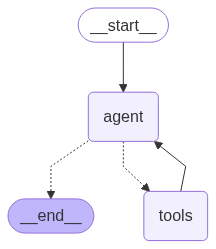

In [4]:
from IPython.display import Image
Image(agent.get_graph().draw_mermaid_png())

In [ ]:
# Use the agent
from langchain_core.runnables.config import RunnableConfig
import datetime

memory=MemorySaver()

def solve_expression(expression:str)->str:
    '''return a value after evalutating a python expression using the "eval()" function'''
    return eval(expression)

def get_date():
    '''return today's date'''
    return datetime.datetime.now()


model = ChatOllama(model="qwen3:1.7b")
tools = [solve_expression,get_date]
agent = create_react_agent(model, tools)

config:RunnableConfig = {"configurable": {"thread_id": "abc123"}}
while True:
    x=input()
    if x=="q":
        break
    for step in agent.stream(
        {"messages": [HumanMessage(content=x)]},
        config,
        stream_mode="values",
    ):
        step["messages"][-1].pretty_print()

================================ Human Message =================================

hi am kshithij
================================== Ai Message ==================================

<think>
Okay, the user said "hi am kshithij". First, I need to understand what they're asking for. They might be introducing themselves. Since there's no specific question, I should respond politely. Let me check the available tools. The functions are solve_expression, get_date, and get_info. None of these apply here. So, I'll just greet them and ask if there's anything else they need help with. Keep it friendly and open-ended.
</think>

Hello! Welcome, Kshithij. How can I assist you today? 😊
================================ Human Message =================================

whats my name
================================== Ai Message ==================================

<think>
Okay, the user is asking, "whats my name?" They want to know their own name. Let me check the tools provided.

Looking at the available f

In [59]:
# from os import listdir
# import itertools
# from pprint import pprint
# path="./hi"
# all_file=[path]
# result=[]

# def get_allfiles(path):
#     global all_file,result
#     print(all_file,1)
#     if len(all_file)==0:
#         return
#     temp=all_file.pop()
#     print(all_file,2)
#     try:
#         (listdir(temp))
#     except:
#         get_allfiles(path)
#     result.append({temp:listdir(path+"/"+temp)})
#     for i in listdir(temp):
#         all_file.append(i)
#     get_allfiles(path)  
    
# get_allfiles(path)

In [130]:
from os import listdir
import itertools
from pprint import pprint

all_file=[]

def files_tool(path):
    global all_file
    all_file=[{path:listdir(path)}]

    def get_allfiles1(path):
        for i in open(".foldignore","r").read().split("\n"):
            if i in path:
                return False
        try:
            listdir(path)
        except:
            return False
        for i in listdir(path):
            temp=path+"/"+i
            if get_allfiles1(temp):
                all_file.append({temp:listdir(temp)})
        return True
    get_allfiles1(path)
    return all_file
    

In [131]:
pprint(files_tool("."))

[{'.': ['.env',
        '.foldignore',
        '.git',
        '.gitignore',
        '.venv',
        'idea.excalidraw',
        'my-app',
        'output.png',
        'test.ipynb',
        'test.py',
        'test1.ipynb',
        'test1.py',
        'test_agent.py',
        'text.html',
        'text.md',
        '__pycache__']},
 {'./.git/hooks': ['applypatch-msg.sample',
                   'commit-msg.sample',
                   'fsmonitor-watchman.sample',
                   'post-update.sample',
                   'pre-applypatch.sample',
                   'pre-commit.sample',
                   'pre-merge-commit.sample',
                   'pre-push.sample',
                   'pre-rebase.sample',
                   'pre-receive.sample',
                   'prepare-commit-msg.sample',
                   'push-to-checkout.sample',
                   'sendemail-validate.sample',
                   'update.sample']},
 {'./.git/info': ['exclude']},
 {'./.git/logs/refs/heads': ['ma